## 🌟一、导入需要的库

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt      
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']     # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False    # 解决图片显示为负号'-'显示为方块的问题
plt.rcParams['savefig.dpi'] = 300     # 设定图片像素
import mglearn       # 导入mglearn图模块

import warnings             
warnings.filterwarnings("ignore")  

In [2]:
from sklearn.model_selection import train_test_split    # 导入测试集划分模块
from sklearn.model_selection import cross_val_score     # 导入交叉验证模块

In [3]:
from sklearn.metrics import classification_report      # 导入分类报告模块
from sklearn.metrics import confusion_matrix          # 导入混淆矩阵模块

## 🌟 二、数据预处理

### 1. 导入数据并观察数据概况

#### 数据含义解释
Pregnancies:怀孕次数 
    
Glucose:口服葡萄糖耐量试验中血浆葡萄糖浓度 
    
BloodPressure:血压（mm/Hg） 
    
SkinThickness:皮脂厚度（mm） 
    
Insulin:2小时血清胰岛素（μU/ml） 
    
BMI:体重指数（kg/（身高(m)）^ 2）
    
DiabetesPedigreeFunction:糖尿病谱系功能
    
Age:年龄（岁）
    
Outcome:是否患病(1/0)

In [4]:
diabetes = pd.read_csv("diabetes.csv")    # 读取csv文件的数据
diabetes[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
diabetes.describe()     # 数据的描述性统计概况

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.info()   # 查看数据集的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
num = diabetes['Outcome'].value_counts()     # 查看标签（是否患病）
num

0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 1.0, '是否患病')

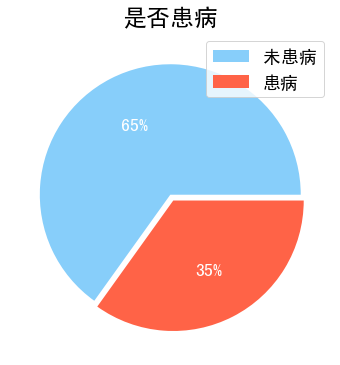

In [8]:
'''
对是否患病的人数进行可视化，
饼图显示有35%的人患糖尿病，
本案例的目的是预测是否患病。
'''
plt.figure(figsize=(6, 6))
labels = ['未患病', '患病']
plt.pie(num, labels=labels, autopct='%.00f%%', explode=(0, 0.05),
        textprops = {'fontsize':18, 'color':'w'}, colors=['lightskyblue', 'tomato'])
plt.legend(loc='upper right',fontsize=18)
plt.title('是否患病',size=24)

In [9]:
# 将数据集分成特征部分和标签部分
data = diabetes.iloc[:,:-1]    # 特征变量
target = diabetes.iloc[:,-1]     # 标签变量

### 2. 数据可视化

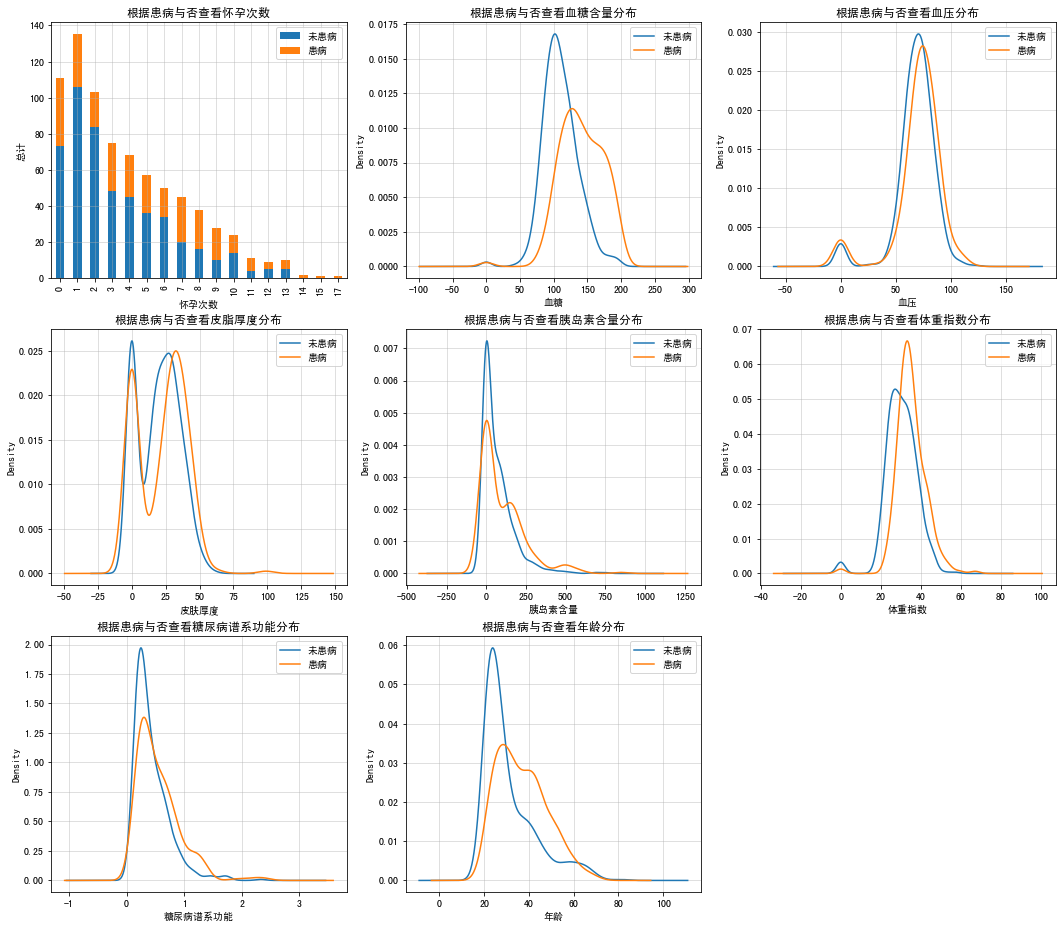

In [10]:
'''
绘制各个特征变量和标签变量的关系图，
从中找到各变量对标签变量的影响。
'''
fig = plt.figure(figsize=(18,16))  # 设置图标尺寸
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

'''怀孕次数和是否患病的关系'''
ax1 = plt.subplot(3,3,1)
# diabetes["Pregnancies"].value_counts().plot(kind = 'bar',color='pink')
no_sicked = diabetes.Pregnancies[diabetes.Outcome == 0].value_counts()
sicked = diabetes.Pregnancies[diabetes.Outcome == 1].value_counts()
df = pd.DataFrame({'未患病':no_sicked, '患病':sicked})
df.plot(ax=ax1,kind='bar',stacked=True)
plt.xlabel(u"怀孕次数")    # 添加x轴标签
plt.ylabel(u"总计")       # 添加y轴标签
plt.title(u"根据患病与否查看怀孕次数")     # 添加标题
plt.legend((u'未患病', u'患病'),loc='best')      # 添加图例
plt.grid(alpha=0.5)      # 设置网格线


'''根据患病与否查看血糖含量分布'''
ax2 = plt.subplot(3,3,2)
diabetes.Glucose[diabetes.Outcome == 0].plot(kind='kde')   # 'kde'为概率密度图
diabetes.Glucose[diabetes.Outcome == 1].plot(kind='kde')
plt.xlabel(u"血糖")      # 添加x轴标签
plt.title(u"根据患病与否查看血糖含量分布")     # 添加标题
plt.legend((u'未患病', u'患病'),loc='best')      # 添加图例
plt.grid(alpha=0.5)       # 设置网格线
 

'''根据患病与否查看血压分布'''
ax3 = plt.subplot(3,3,3)
diabetes.BloodPressure[diabetes.Outcome == 0].plot(kind='kde')   # 'kde'为概率密度图
diabetes.BloodPressure[diabetes.Outcome == 1].plot(kind='kde')
plt.xlabel(u"血压")      # 添加x轴标签
plt.title(u"根据患病与否查看血压分布")     # 添加标题
plt.legend((u'未患病', u'患病'),loc='best')      # 添加图例
plt.grid(alpha=0.5)       # 设置网格线

'''根据患病与否查看皮脂厚度分布'''
ax4 = plt.subplot(3,3,4)
diabetes.SkinThickness[diabetes.Outcome == 0].plot(kind='kde')   # 'kde'为概率密度图
diabetes.SkinThickness[diabetes.Outcome == 1].plot(kind='kde')
plt.xlabel(u"皮肤厚度")      # 添加x轴标签
plt.title(u"根据患病与否查看皮脂厚度分布")     # 添加标题
plt.legend((u'未患病', u'患病'),loc='best')      # 添加图例
plt.grid(alpha=0.5)       # 设置网格线
        
    
'''根据患病与否查看胰岛素含量分布'''
ax5 = plt.subplot(3,3,5)
diabetes.Insulin[diabetes.Outcome == 0].plot(kind='kde')   # 'kde'为概率密度图
diabetes.Insulin[diabetes.Outcome == 1].plot(kind='kde')
plt.xlabel(u"胰岛素含量")      # 添加x轴标签
plt.title(u"根据患病与否查看胰岛素含量分布")     # 添加标题
plt.legend((u'未患病', u'患病'),loc='best')      # 添加图例
plt.grid(alpha=0.5)       # 设置网格线    
    
    
'''根据患病与否查看体重指数分布'''
ax6 = plt.subplot(3,3,6)
diabetes.BMI[diabetes.Outcome == 0].plot(kind='kde')   # 'kde'为概率密度图
diabetes.BMI[diabetes.Outcome == 1].plot(kind='kde')
plt.xlabel(u"体重指数")      # 添加x轴标签
plt.title(u"根据患病与否查看体重指数分布")     # 添加标题
plt.legend((u'未患病', u'患病'),loc='best')      # 添加图例
plt.grid(alpha=0.5)       # 设置网格线     


'''根据患病与否查看糖尿病谱系功能分布'''
ax7 = plt.subplot(3,3,7)
diabetes.DiabetesPedigreeFunction[diabetes.Outcome == 0].plot(kind='kde')   # 'kde'为概率密度图
diabetes.DiabetesPedigreeFunction[diabetes.Outcome == 1].plot(kind='kde')
plt.xlabel(u"糖尿病谱系功能")      # 添加x轴标签
plt.title(u"根据患病与否查看糖尿病谱系功能分布")     # 添加标题
plt.legend((u'未患病', u'患病'),loc='best')      # 添加图例
plt.grid(alpha=0.5)       # 设置网格线 


    
'''根据患病与否查看年龄分布'''
ax8 = plt.subplot(3,3,8)
diabetes.Age[diabetes.Outcome == 0].plot(kind='kde')   # 'kde'为概率密度图
diabetes.Age[diabetes.Outcome == 1].plot(kind='kde')

plt.xlabel(u"年龄")    # 添加x轴标签
plt.title(u"根据患病与否查看年龄分布")    # 添加标题
plt.legend((u'未患病', u'患病'),loc='best')   # 添加图例
plt.grid(alpha=0.5)       # 设置网格线

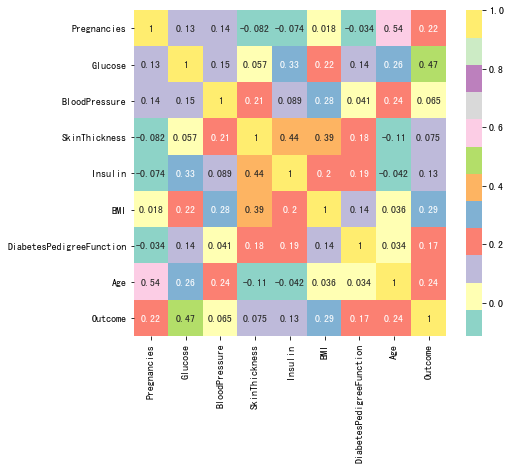

In [11]:
# 绘制各个变量（包括特征变量和标签变量）之间的相关系数热力图
corr = diabetes[diabetes.columns].corr()     # 计算变量之间的相关系数
plt.subplots(figsize=(7, 6))
sns.heatmap(corr, annot=True, cmap='Set3')        # 绘制相关系数热力图

### 3. 特征重要性评估

#### 使用互信息法来捕捉每个特征与标签之间的任意关系（包括线性和非线性关系）。
#### 互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间取值，为0则表示两个变量独立，为1则表示两个变量完全相关。

In [12]:
from sklearn.feature_selection import mutual_info_classif as MIC    # 导入特征选择模块
 
feature_importances = MIC(data,target)
feature_importances

array([0.0294822 , 0.11695185, 0.        , 0.02334228, 0.05437345,
       0.08066056, 0.00852278, 0.06508231])

In [13]:
k = sum(feature_importances > 0)   # 输出特征与标签之间的关系强度>0的特征数
k

7

#### ⚠️特征与标签之间的关系强度>0的特征数为8，每个特征都会对类别变量造成一定影响，所以我们保留全部特征。

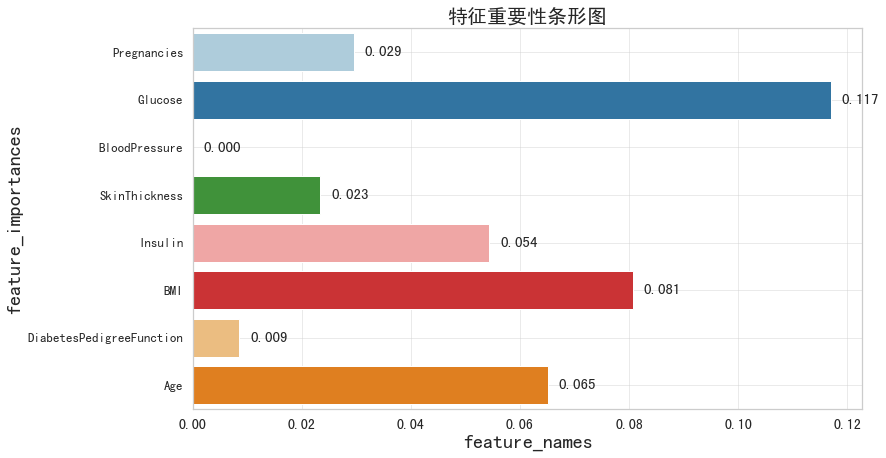

In [14]:
# 绘制特征重要性条形图
sns.set(font='SimHei',style='whitegrid')      # 设置中文显示和背景图颜色
fig = plt.figure(figsize=(12, 7))
fig.tight_layout()
ax = fig.add_subplot(111)
feature_names = diabetes.iloc[:,:-1].columns.values
x = feature_names
y = feature_importances

ax = sns.barplot(x=y, y=x, palette="Paired",orient='h')
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.xlabel('feature_names',fontsize='20')          # 设置x轴标签
plt.ylabel('feature_importances',fontsize='20')      # 设置y轴标签
plt.title('特征重要性条形图',fontsize='20')          # 设置条形图标题
plt.grid(alpha=0.4)                    # 设置网格线

for p in ax.patches:        # 添加数据标签
    w = p.get_width()        # 获取每个条形图的宽度
    ax.text(x = w+0.002,y=p.get_y()+(p.get_height()/2),s = '{:.3f}'.format(w), va = 'center',fontsize=15)    

plt.show() 

### 4. 数据标准化
#### 考虑到一些算法（神经网络和SVM）对数据的缩放非常敏感，需要对特征进行调节，即对数据进行简单的按特征缩放和移动，从而使数据更加适合于这些算法，所以本案例使用StandarScaler方法对数据进行标准化处理，消除各个特征之间的量纲。

In [15]:
from sklearn import preprocessing    # 导入标准化需要的模块

data = preprocessing.StandardScaler().fit_transform(data)   # 对所有特征进行标准化
data[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

### 5. 数据降维与可视化
#### 为了将不同类别的样本数据在一张二维图中显示出来，可以利用主成分分析进行降维，使得8个特征变为2个特征并在二维图上展示出来。

Text(0.5, 1.0, 'Principal Analysis')

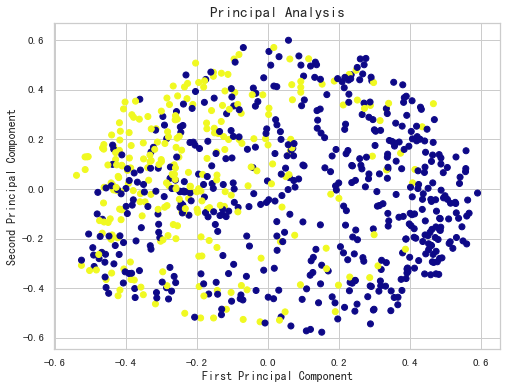

In [16]:
# 在对数据进行标准化之后，利用主成分分析进行降维可视化
from sklearn.decomposition import KernelPCA      # 导入主成分降维模块

kpca = KernelPCA(n_components=2, kernel='rbf')
X_pca = kpca.fit_transform(data) 
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=target,cmap='plasma')
plt.xlabel("First Principal Component", size=12)
plt.ylabel("Second Principal Component", size=12)
plt.title("Principal Analysis", fontsize=15)

## 🌟三、模型选择和数据分析
### Step1：将所有数据划分成训练集和测试集，其中测试集占所有数据的20%；
### Step2：选择几个对模型影响较大的参数绘制学习曲线，初步探索参数的搜索范围；
### Step3：定义一个包含交叉验证的网格搜索函数，基于交叉验证集得分探索每个模型的较优参数组合，并在一定范围内搜索到的最佳参数进行模型训练；
### Step4：定义一个绘制特征重要性条形图的函数，探测不同模型对各个特征的重视程度；
### Step5：用训练好的模型对测试集数据进行预测，并利用测试集得分和混淆矩阵评估模型的优良。

In [17]:
# 划分训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(data, target, test_size=0.2, random_state = 1)

In [18]:
# 定义含交叉验证的网格搜索函数，用于探索最佳模型参数
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters:{grid_search.best_params_}")
    print("Best cross-validation score:{:.3f}".format(grid_search.best_score_))
    print("Training set score:{:.3f}".format(grid_search.score(X_train, Y_train)))
    print("Test set score:{:.3f}".format(grid_search.score(X_test, Y_test)))

In [19]:
# 定义绘制特征重要性条形图的函数
def plot_feature_importances(model):
    # 特征重要性条形图
    sns.set(font='SimHei',style='whitegrid')      # 设置中文显示
    fig = plt.figure(figsize=(15, 8))
    fig.tight_layout()
    ax = fig.add_subplot(111)
    ax = sns.barplot(x=model.feature_importances_, y=feature_names, palette="Paired",orient='h')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=13)
    plt.xlabel('feature_names',fontsize='20')      # 设置x轴标签
    plt.ylabel('feature_importances',fontsize='20')      # 设置y轴标签
    plt.title('特征重要性条形图',fontsize='20')     # 设置条形图标题
    plt.grid(alpha=0.4)                # 设置网格线
    # 添加数据标签
    for p in ax.patches:
        w = p.get_width()   # 获取每个条形图的宽度
        ax.text(x = w+0.002,y=p.get_y()+(p.get_height()/2),s = '{:.3f}'.format(w), va = 'center',fontsize=15)    

    plt.show() 

In [20]:
'''
定义一个模型评估函数，给出模型的训练集得分、测试集得分，
并给出模型的误分类个数、混淆矩阵和分类报告。
'''
def model_evaluation(model):
    model = model.fit(X_train,Y_train)  # 模型拟合
    Y_pred = model.predict(X_test)     # 模型在测试集上的预测结果
    
    # 给出该模型在训练集和测试集上的得分
    print(f"训练集的得分为：{model.score(X_train, Y_train)}")
    print(f"测试集的得分为：{model.score(X_test,Y_test)}")
    
    # 给出模型在测试集上的误分类个数
    error_num = (Y_test != Y_pred).sum() 
    print(f"该模型在测试集上的误分类个数为：{error_num}")    # 输出误分类个数
    
    # 该模型在测试集上的混淆矩阵
    plt.figure(figsize=(6, 5))
    confusion = confusion_matrix(Y_test, Y_pred)       
    print("该模型的混淆矩阵为:\n{}".format(confusion))    # 输出混淆矩阵
    sns.set(font_scale=2)
    sns.heatmap(confusion, square=True, annot=True, cmap='Set3')    # 用seaborn绘制混淆矩阵的热力图
    plt.title("Confusion Matrix", size=18)        # 添加标题
    plt.xlabel('Predicted value', size=15)       # 添加x轴副标题
    plt.ylabel('True value', size=15)        # 添加y轴副标题
    plt.show()
    print(f"该模型的分类报告为:\n{classification_report(Y_test, Y_pred)}")    # 输出分类报告

### 1. 决策树
#### 决策树主要考虑的便是树的层数即深度，若不限制树的深度，树的深度很大导致叶子节点都是纯的，足以让记住训练数据的所有标签，出现过拟合的情况，泛化能力不佳，因此需要采取剪枝操作，可以设置max_depth，默认是None，即自动扩大到纯节点。

#### 1.1 学习曲线模拟

交叉验证的最大得分为:0.7383329089211441，最大得分的参数为:3


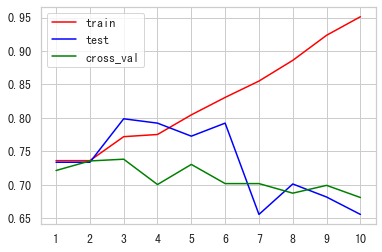

In [21]:
from sklearn.tree import DecisionTreeClassifier   # 导入决策树的库

tr = []; te = []; cv = []    # 创建三个列表用于存储训练集、测试集和交叉验证集得分
for i in range(10):      # 选择不同的深度，绘制学习曲线
    clf = DecisionTreeClassifier(random_state=25,
                                 max_depth = i+1,
                                 criterion='entropy')
    clf = clf.fit(X_train,Y_train)
    score_tr = clf.score(X_train,Y_train)      # 训练集得分
    score_te = clf.score(X_test, Y_test)       # 测试集得分
    score_cv = cross_val_score(clf,data,target,cv=5).mean()     # 交叉验证集得分
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)

print(f"交叉验证的最大得分为:{max(cv)}，最大得分的参数为:{np.argmax(cv)+1}")

# 画出模型在训练集、测试集和交叉验证集上的得分曲线
plt.figure(figsize=(6,4))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.plot(range(1,11),cv,color='green',label='cross_val')
plt.xticks(range(1,11), size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### ⚠️ 从学习曲线中可以发现当max_depth超过6，交叉验证集和测试集得分开始下降，训练集得分快速上升，趋向过拟合，所以后续网格搜索可以将搜索范围控制在1-8之间。

#### 1.2 网格搜索寻找较优参数

In [22]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置criterion、splitter、max_depth、min_samples_leaf四个参数，
其中criterion是特征选择方法，
max_depth是树的最大深度，splitter是切分点方法，
min_samples_leaf是叶子节点最少的样本数。
'''
param_grid = {'criterion':('gini','entropy')
             ,'splitter':('best','random')
             ,'max_depth':np.arange(1, 8)
             ,'min_samples_leaf':np.arange(1, 5)
             }

dt = DecisionTreeClassifier(random_state=0)
grid_search(dt, param_grid)

Best parameters:{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'splitter': 'best'}
Best cross-validation score:0.746
Training set score:0.774
Test set score:0.786


#### 1.3 评估搜索到的较优模型

训练集的得分为：0.7736156351791531
测试集的得分为：0.7857142857142857
该模型在测试集上的误分类个数为：33
该模型的混淆矩阵为:
[[85 14]
 [19 36]]


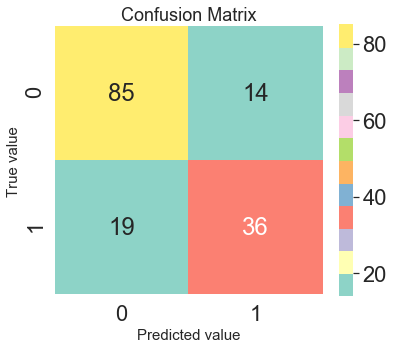

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [23]:
'''
由网格可知，当criterion选择gini指数，max_depth=3，splitter选择best，min_samples_leaf为1时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best',
                             min_samples_leaf=1, random_state=0)
model_evaluation(dt)

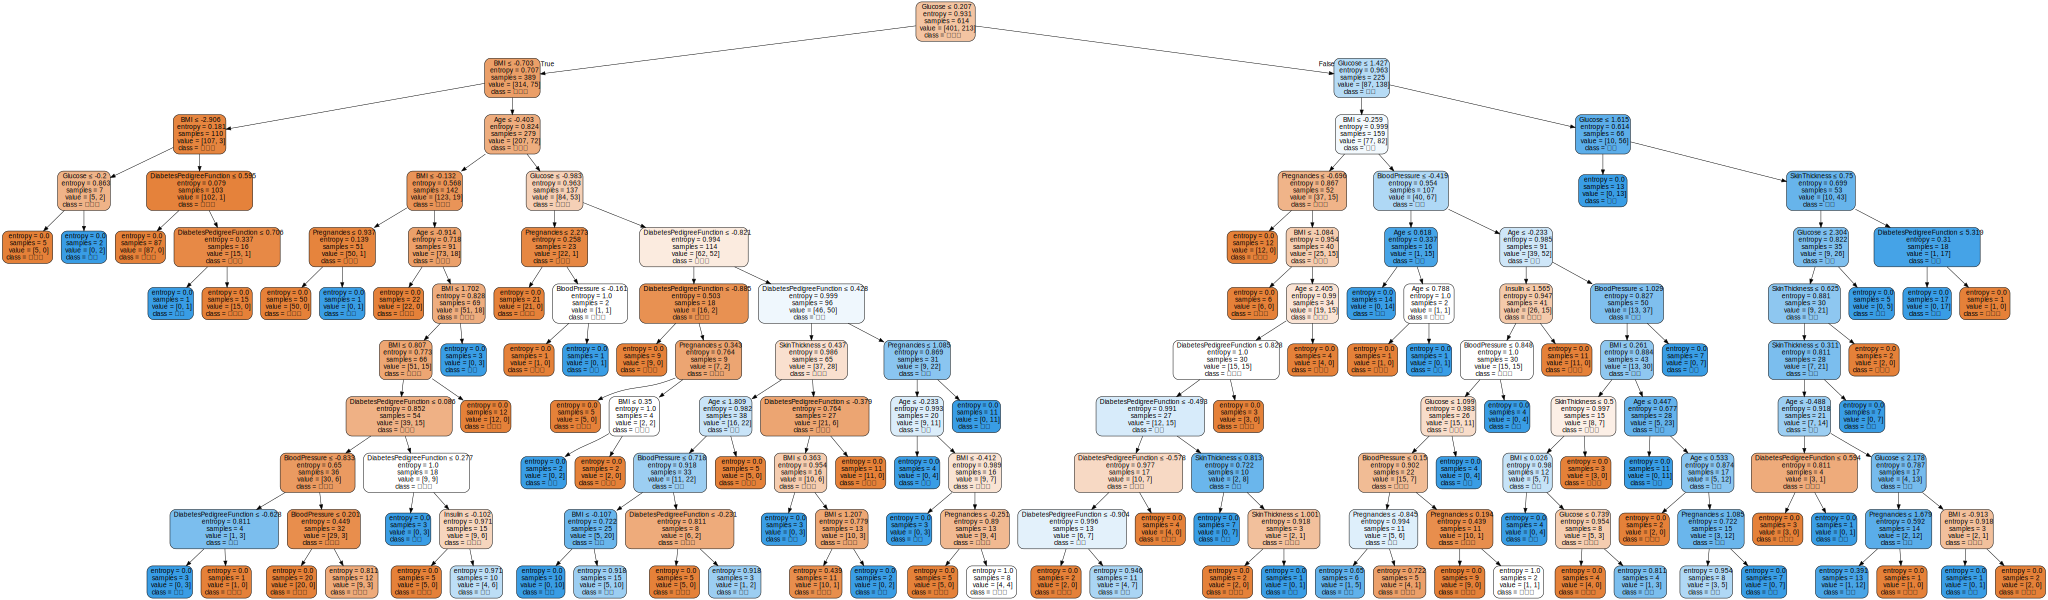

In [24]:
# 将决策树可视化

import graphviz
from sklearn.tree import export_graphviz

dt = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best',
                            min_samples_leaf=1, random_state=0)           # 模型实例化
dt = clf.fit(X_train,Y_train)                 # 模型拟合

dot_data = export_graphviz(dt, out_file=None, feature_names=feature_names
                          ,class_names=['未患病','患病']
                          ,filled=True    # 颜色
                          ,rounded=True     # 圆形
                          ,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### 分析：网格搜索到的较优决策树模型为DecisionTreeClassifier(criterion='entropy', max_depth = 3,splitter='best',min_samples_leaf=1)，误判个数为33个，在训练集上的得分为0.774，在测试集上的得分为0.786，泛化能力较好。从测试报告中可知，准确率为0.79，预测不患病的f1_score为0.84，预测患病的f1_score为0.69，预测患病的错误率较高。

### 2. 支持向量机

#### 2.1 学习曲线模拟
SVM的模型有两个重要的参数：一个是正则化参数C，限制了每个样本点的重要性，即对误差的容忍度，C越高，说明越不能容忍出现误差,容易过拟合，C越小，容易欠拟合，因此C过大或过小，泛化能力变差；另一个是gamma，用于控制核的宽度，决定点与点之间“靠近”是指多大的距离，gamma越大，支持向量越少，就是通常说的过拟合；gamma值越小，支持向量越多，则会造成平滑效应太大，无法在训练集上得到特别高的准确率，也会影响测试集的准确率。

交叉验证的最大得分为:0.7787284610814021，最大得分的参数为:4


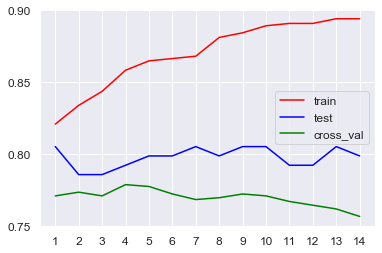

In [25]:
from sklearn.svm import SVC    # 导入支持向量机的模块

tr = []; te = []; cv = []
for i in range(1,15):     # 选择不同的C参数，绘制学习曲线
    model = SVC(C=i)
    svm = model.fit(X_train, Y_train)
    score_tr = svm.score(X_train,Y_train)
    score_te = svm.score(X_test, Y_test)
    score_cv = cross_val_score(svm,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的参数为:{np.argmax(cv)+1}")
plt.plot(range(1,15),tr,color='red',label='train')
plt.plot(range(1,15),te,color='blue',label='test')
plt.plot(range(1,15),cv,color='green',label='cross_val')
plt.xticks(range(1,15), size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### ⚠️ 从图中可知当选择不同的C参数时，交叉验证集的得分和测试集的得分变化不大，但是当C超过8，模型在训练集上的得分越来越大，可能会趋于过拟合，所以在后续网格搜索时，可以把C参数设置在1-10之间。

#### 2.2 网格搜索寻找较优参数

In [26]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置C和gamma这两个参数，
其中C是目标函数的惩罚系数，用来平衡分类间隔margin和错分样本,
gamma是核函数的系数。
'''
param_grid = {'C': range(1, 10),
              'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 1, 10]
              }
svm = SVC()
grid_search(svm, param_grid)

Best parameters:{'C': 7, 'gamma': 0.001}
Best cross-validation score:0.777
Training set score:0.775
Test set score:0.779


#### 2.3 评估搜索到的最优模型

训练集的得分为：0.7752442996742671
测试集的得分为：0.7792207792207793
该模型在测试集上的误分类个数为：34
该模型的混淆矩阵为:
[[91  8]
 [26 29]]


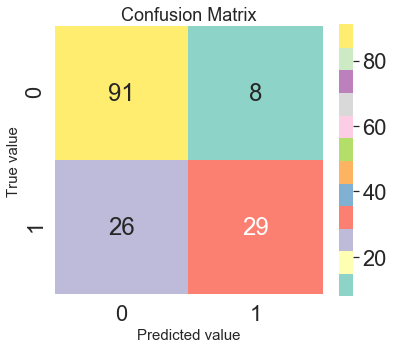

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        99
           1       0.78      0.53      0.63        55

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



In [27]:
'''
由学习曲线可知，当C=7，gamma=0.001时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
svm = SVC(C=7, gamma=0.001)
model_evaluation(svm)

### 分析：网格搜索到的支持向量机模型为SVC(c=7,gamma=0.001)，误判个数为34个，在训练集上的得分为0.775，在测试集上的得分为0.779，泛化能力较好。从测试报告中可知，准确率为0.78，预测不患病的f1_score为0.84，预测患病的f1_score为0.63，预测患病的错误率较高。

### 3. 朴素贝叶斯

#### 3.1 模型训练
由于朴素贝叶斯模型不需要调参，所以直接用高斯朴素贝叶斯和伯努利朴素贝叶斯训练模型，并评估模型。

训练集的得分为：0.7703583061889251
测试集的得分为：0.7727272727272727
该模型在测试集上的误分类个数为：35
该模型的混淆矩阵为:
[[85 14]
 [21 34]]


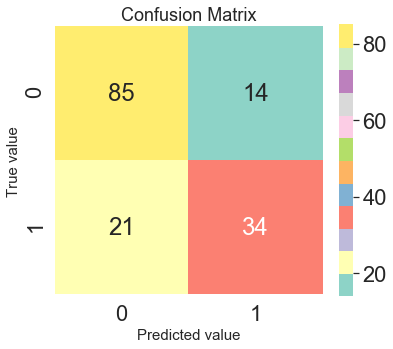

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [28]:
from sklearn.naive_bayes import GaussianNB      # 导入高斯贝叶斯分类器

gnb = GaussianNB()    # 高斯朴素贝叶斯分类器
model_evaluation(gnb)    # 评估模型

训练集的得分为：0.7166123778501629
测试集的得分为：0.7532467532467533
该模型在测试集上的误分类个数为：38
该模型的混淆矩阵为:
[[78 21]
 [17 38]]


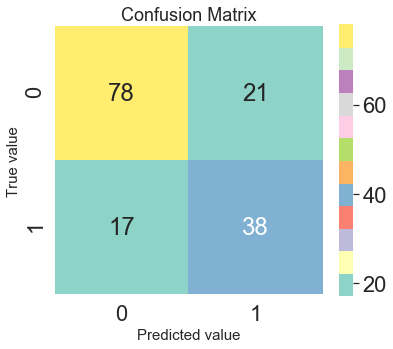

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [29]:
from sklearn.naive_bayes import BernoulliNB      # 导入伯努利贝叶斯分类器
bnb = BernoulliNB()   # 伯努利朴素贝叶斯分类器
model_evaluation(bnb)    # 评估模型

### 分析：对于高斯朴素贝叶斯模型，误判个数为35个，在训练集上的得分为0.770，在测试集上的得分为0.772，泛化能力较好。从测试报告中可知，准确率为0.77，预测不患病的f1_score为0.83，预测患病的f1_score为0.66，预测患病的错误率较高。
### 对于伯努利朴素贝叶斯模型，误判个数为38个，在训练集上的得分为0.717，在测试集上的得分为0.753，泛化能力一般。从测试报告中可知，准确率为0.75，预测不患病的f1_score为0.80，预测患病的f1_score为0.67，预测患病的错误率较高。所以高斯朴素贝叶斯模型的效果更好。

### 4. 逻辑回归

#### 4.1 学习曲线模拟

交叉验证的最大得分为:0.7721840251252015，最大得分的下标为:24


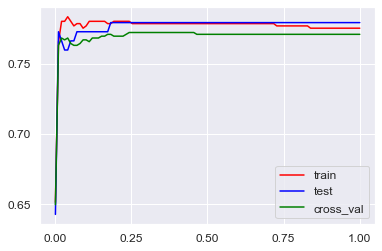

In [33]:
from sklearn.linear_model import LogisticRegression  

tr = []; te = []; cv = []
C = np.linspace(0.001, 1, 100)
for i in C:         # 选择不同的C参数绘制学习曲线
    model = LogisticRegression(C=i)
    lr = model.fit(X_train, Y_train)
    score_tr = lr.score(X_train,Y_train)
    score_te = lr.score(X_test, Y_test)
    score_cv = cross_val_score(lr,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.plot(C,tr,color='red',label='train')
plt.plot(C,te,color='blue',label='test')
plt.plot(C,cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12) 
plt.legend(fontsize=12)
plt.show()

#### ⚠️ 当正则化系数超过0.25之后，模型在三个数据集上的得分差异不明显，所以在后续网格搜索时，可以将C控制在0-0.5之间。

#### 4.2 网格搜索寻找较优参数

In [34]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置C和penalty这两个参数，
其中C是正则化系数，penalty是惩罚函数的形式。
'''
param_grid = {'C': np.linspace(0.001, 0.5, 100),
              'penalty': ['l1','l2']}
lr = LogisticRegression()
grid_search(lr, param_grid)

Best parameters:{'C': 0.07660606060606061, 'penalty': 'l2'}
Best cross-validation score:0.780
Training set score:0.779
Test set score:0.773


#### 4.3 评估搜索到的最优模型

训练集的得分为：0.7785016286644951
测试集的得分为：0.7727272727272727
该模型在测试集上的误分类个数为：35
该模型的混淆矩阵为:
[[89 10]
 [25 30]]


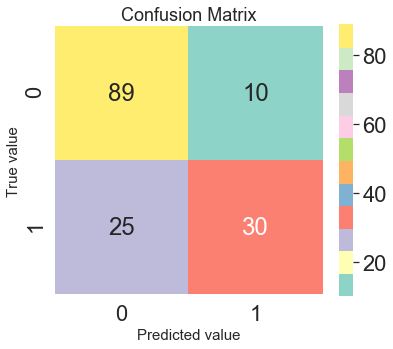

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [35]:
'''
通过网格搜索得到C=0.0766,penalty=l2时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
log_reg = LogisticRegression(C=0.0766, penalty='l2')
model_evaluation(log_reg)

### 分析：网格搜索到的逻辑回归模型为LogisticRegression(C=0.0766, penalty='l2')，误判个数为35个，在训练集上的得分为0.7785，在测试集上的得分为0.7727，泛化能力较好。从测试报告中可知，准确率为0.77，预测不患病的f1_score为0.84，预测患病的f1_score为0.63，预测患病的错误率较高。

### 5. K近邻

#### 5.1 学习曲线模拟
KNN模型需要调整的是k(n_neighbors)的个数，可以通过绘制训练精度、测试精度和交叉验证精度与不同K值得关系曲线图来找出最合适的K值。

交叉验证的最大得分为:0.7669892199303965，最大得分的参数为:17


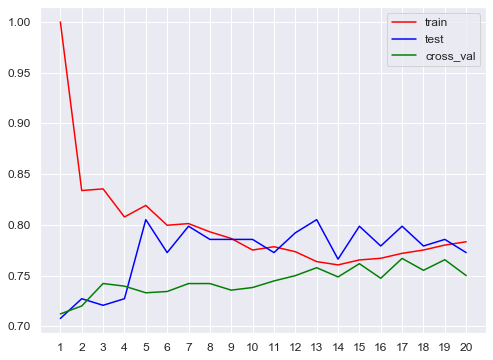

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# 调整模型最重要的参数n_neighbors
tr = []; te = []; cv=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, Y_train)
    score_te = knn.score(X_test,Y_test)
    score_tr = knn.score(X_train,Y_train)
    score_cv = cross_val_score(knn,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的参数为:{np.argmax(cv)+1}")
plt.figure(figsize=(8,6))
plt.plot(range(1,21),tr,color='red',label='train')
plt.plot(range(1,21),te,color='blue',label='test')
plt.plot(range(1,21),cv,color='green',label='cross_val')
plt.xticks(range(1,21), size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### ⚠️ 随着k的增大，训练精度逐渐下降，后面又开始上升，而测试集和交叉验证集的得分逐渐上升直到变化不大，所以在后续网格搜索中将k设置为1-20。

#### 5.2 网格搜索寻找较优参数

In [37]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置n_neighbors一个参数，代表k个邻居。
'''
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_search(knn, param_grid)

Best parameters:{'n_neighbors': 18}
Best cross-validation score:0.749
Training set score:0.775
Test set score:0.779


#### 5.3 评估搜索到的最优模型

训练集的得分为：0.7752442996742671
测试集的得分为：0.7792207792207793
该模型在测试集上的误分类个数为：34
该模型的混淆矩阵为:
[[91  8]
 [26 29]]


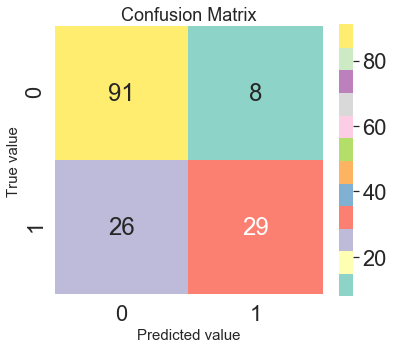

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        99
           1       0.78      0.53      0.63        55

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



In [38]:
'''
通过网格搜索到最优参数n_neighbors=18时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
knn = KNeighborsClassifier(n_neighbors=18)   
model_evaluation(knn)

### 分析：网格搜索到的k近邻模型为KNeighborsClassifier(n_neighbors=18) ，误判个数为34个，在训练集上的得分为0.775，在测试集上的得分为0.779，泛化能力较好。从测试报告中可知，准确率为0.78，预测不患病的f1_score为0.84，预测患病的f1_score为0.63，预测患病的错误率较高。

### 6. 随机森林

#### 6.1 学习曲线模拟
随机森林模型中的一个重要参数n_estimators表示最大的弱学习器的个数，若n_estimators太小，容易欠拟合，n_estimators太大，计算量会很大，并且n_estimators到一定的数量后，再增大n_estimators获得的模型提升会很小，所以要选择一个适中的数值。

交叉验证的最大得分为:0.7800186741363212，最大得分的参数为:50


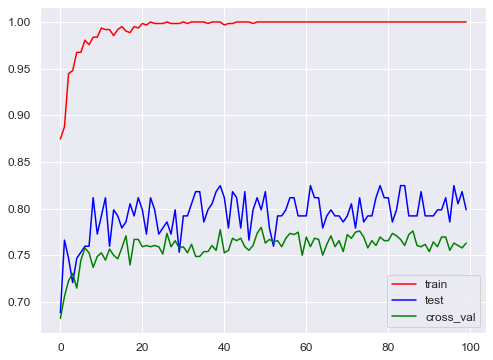

In [40]:
from sklearn.ensemble import RandomForestClassifier   #导入需要的模块

# 调整随机森林模型中基学习器的个数，即n_estimators参数
tr = []; te = []; cv=[]
for i in range(100):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc = rfc.fit(X_train, Y_train)
    score_te = rfc.score(X_test,Y_test)
    score_tr = rfc.score(X_train,Y_train)
    score_cv = cross_val_score(rfc,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的参数为:{np.argmax(cv)+1}")
plt.figure(figsize=(8,6))
plt.plot(range(100),tr,color='red',label='train')
plt.plot(range(100),te,color='blue',label='test')
plt.plot(range(100),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### ⚠️ 从学习曲线中可以看到，当学习器的个数超过30，训练集得分趋向于1，模型非常容易过拟合，而且交叉验证集得分和测试集的得分变化不是非常大，所以在后续调参时，可以将n_estimators设置在1-50之间。

#### 6.2 网格搜索寻找最优参数

In [41]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置n_estimators和max_depth两个参数，
其中n_estimators是最大的弱学习器的个数，max_depth是树的最大深度。
'''
param_grid = {'n_estimators':np.arange(1, 100, 1),
              'max_depth':np.arange(1, 10, 1)}
rfc = RandomForestClassifier()
grid_search(rfc, param_grid)

Best parameters:{'max_depth': 5, 'n_estimators': 39}
Best cross-validation score:0.775
Training set score:0.845
Test set score:0.799


#### 6.3 评估搜索到的最优模型

训练集的得分为：0.8566775244299675
测试集的得分为：0.7922077922077922
该模型在测试集上的误分类个数为：32
该模型的混淆矩阵为:
[[91  8]
 [24 31]]


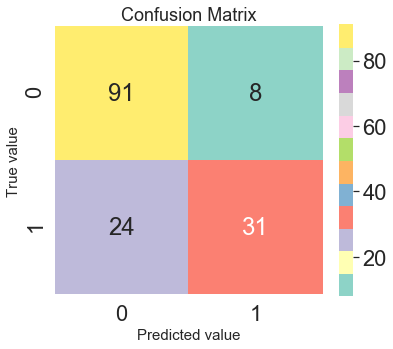

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        99
           1       0.79      0.56      0.66        55

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.79      0.79      0.78       154



In [45]:
'''
通过网格搜索得到当n_estimators=39, max_depth=5时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
rfc = RandomForestClassifier(n_estimators=39, max_depth=5)
model_evaluation(rfc)

In [46]:
rfc.feature_importances_    # 输出各个特征重要性

array([0.06552622, 0.34328796, 0.05332425, 0.03936638, 0.09130481,
       0.18421681, 0.09648413, 0.12648944])

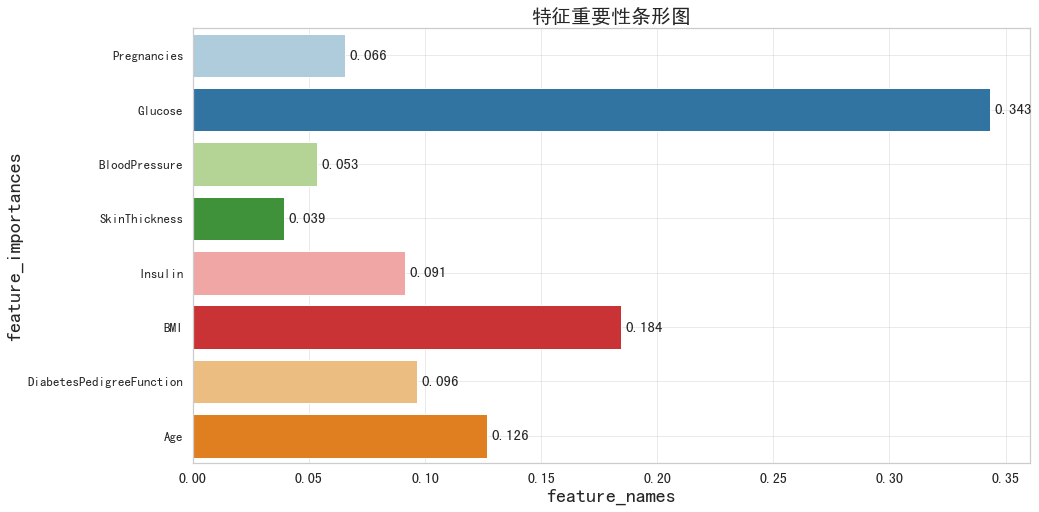

In [47]:
plot_feature_importances(rfc)    # 特征重要程度可视化

### 分析：网格搜索到的随机森林模型为RandomForestClassifier(n_estimators=39, max_depth=5) ，误判个数为32个，在训练集上的得分为0.857，在测试集上的得分为0.792，泛化能力较好。并从特征重要性条形图中可以看到，随机森林模型中把Glucose(血糖浓度)、BMI指数、Age视为重要，BloodPressure、SkinThickness、Insulin视为较不重要。从测试报告中可知，准确率为0.79，是比较高的，预测不患病的f1_score为0.85，预测患病的f1_score为0.66，预测患病的错误率较高。

### 7. Adaboost

#### 7.1 学习曲线模拟
Adaboost也是一种集成模型，它的重要参数也是弱学习器的个数，若n_estimators太小，容易欠拟合，n_estimators太大，计算量会很大，所以要选择一个适中的数值。另一个重要参数时learning_rate（学习率），即每个弱学习器的权重缩减系数，所以需要调整这两个参数来提升模型的性能。

交叉验证的最大得分为:0.7747899159663865，最大得分的下标为:5


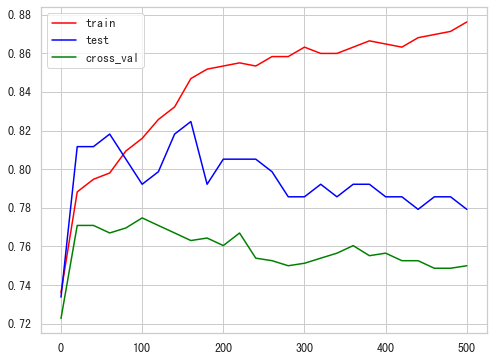

In [48]:
from sklearn.ensemble import AdaBoostClassifier

# 调整Adaboost模型中基学习器的个数，即n_estimators参数
tr = []; te = []; cv=[]
for i in range(0,501,20):
    ada_clf = AdaBoostClassifier(n_estimators=i+1,algorithm="SAMME.R",
                                 learning_rate=0.5,random_state=20)
    ada_clf = ada_clf.fit(X_train, Y_train)
    score_te = ada_clf.score(X_test,Y_test)
    score_tr = ada_clf.score(X_train,Y_train)
    score_cv = cross_val_score(ada_clf,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(range(0,501,20),tr,color='red',label='train')
plt.plot(range(0,501,20),te,color='blue',label='test')
plt.plot(range(0,501,20),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

交叉验证的最大得分为:0.7826160767337237，最大得分的下标为:57


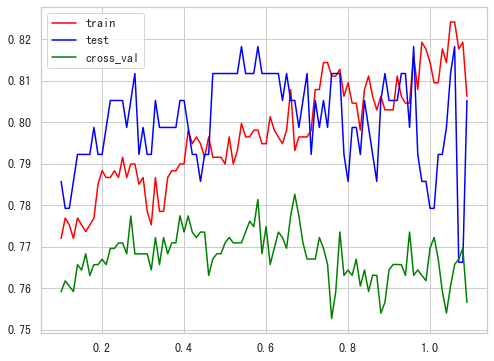

In [49]:
# 调整学习率，即learning_rate参数
tr = []; te = []; cv=[]
list = np.arange(0.1, 1.1, 0.01)
for i in list:
    ada_clf = AdaBoostClassifier(n_estimators=40,algorithm="SAMME.R",
                                 learning_rate=i,random_state=20)
    ada_clf = ada_clf.fit(X_train, Y_train)
    score_te = ada_clf.score(X_test,Y_test)
    score_tr = ada_clf.score(X_train,Y_train)
    score_cv = cross_val_score(ada_clf,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(list,tr,color='red',label='train')
plt.plot(list,te,color='blue',label='test')
plt.plot(list,cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### ⚠️ 由学习曲线可得，当弱学习器的的个数超过200，模型就会趋于过拟合，在交叉验证集和测试集的得分也会降低，所以后续网格搜索将参数控制在1-200之间即可。而学习率过大的波动比较大，所以设置在0-1之间。

#### 7.2 网格搜索寻找最优参数

In [50]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置n_estimators和learning_rate两个参数，
其中n_estimators是最大的弱学习器的个数，learning_rate是每个弱学习器的权重缩减系数。
'''
param_grid = {'n_estimators': range(1, 201, 20),
              'learning_rate': np.arange(0.1, 1.1, 0.1)}
ada = AdaBoostClassifier()
grid_search(ada, param_grid)

Best parameters:{'learning_rate': 0.2, 'n_estimators': 41}
Best cross-validation score:0.764
Training set score:0.787
Test set score:0.799


#### 7.3 评估搜索到的最优模型

训练集的得分为：0.7866449511400652
测试集的得分为：0.7987012987012987
该模型在测试集上的误分类个数为：31
该模型的混淆矩阵为:
[[90  9]
 [22 33]]


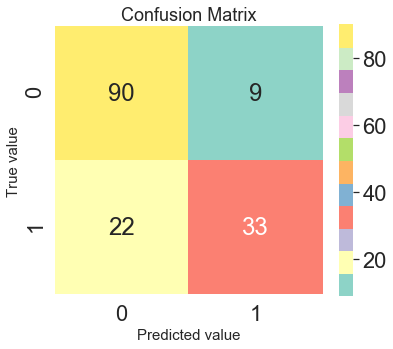

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.79      0.60      0.68        55

    accuracy                           0.80       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.80      0.80      0.79       154



In [51]:
'''
由网格搜索可得，当n_estimators=41，learning_rate=0.2，max_depth=1时，
交叉验证集的得分最高，所以在这种参数设置下评估模型的预测效果。
'''
ada = AdaBoostClassifier(n_estimators=41,algorithm="SAMME.R",
                         learning_rate=0.2,random_state=0
            )
model_evaluation(ada)

In [52]:
ada.feature_importances_     # 特征重要性

array([0.09756098, 0.31707317, 0.02439024, 0.        , 0.        ,
       0.2195122 , 0.19512195, 0.14634146])

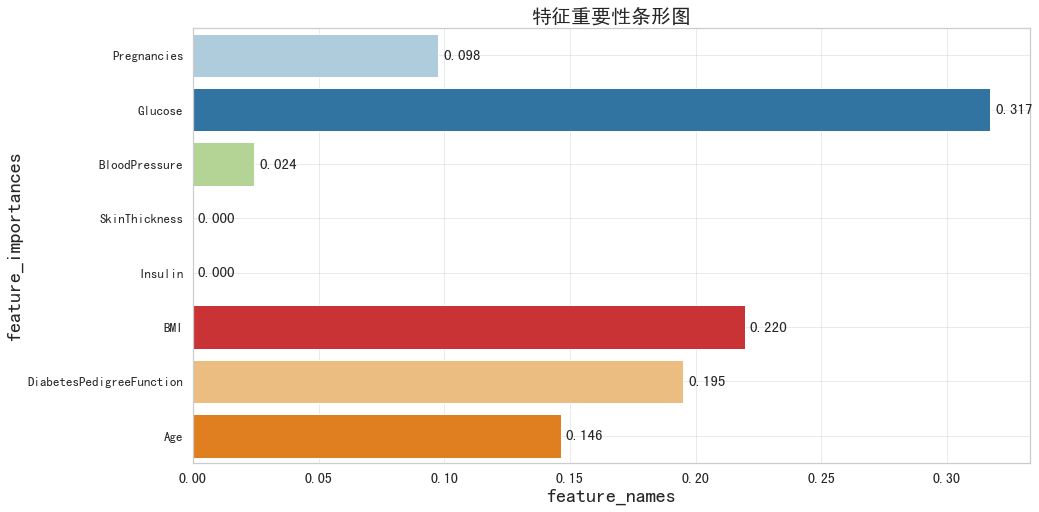

In [53]:
plot_feature_importances(ada)   # 特征重要性可视化

### 分析：网格搜索到的Adaboost模型为AdaBoostClassifier(n_estimators=41,algorithm="SAMME.R",learning_rate=0.2,random_state=0)，误判个数为31个，在训练集上的得分为0.787，在测试集上的得分为0.799，泛化能力较好。并且Adaboost将Glucose、BMI、DiabeteaPedigreeFUnction、Age都视为重要，而将SkinThickness和Insulin的特征重要性视作0，相当于进行了特征选择。再从测试报告中可知，准确率为0.80，预测不患病的f1_score为0.85，预测患病的f1_score为0.68，预测准确率是相对较高的。

### 8. 梯度提升树

#### 8.1 学习曲线模拟
GBDT也是一种集成方法，参数n_estimators是弱学习器的最大迭代次数，也可以说是最大的弱学习器的个数，n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合。参数learning_rate是每个弱学习器的权重缩减系数，也称作步长。

交叉验证的最大得分为:0.7761225702402174，最大得分的下标为:8


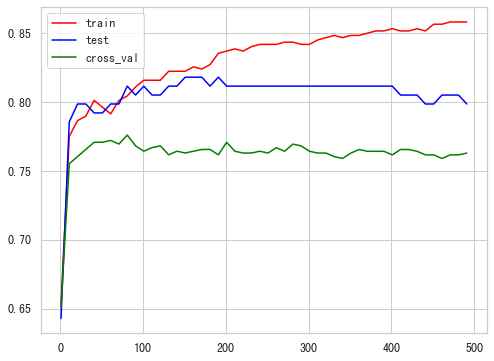

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

# 变换梯度提升树中弱学习器的个数，即n_estimators参数
tr = []; te = []; cv=[]
for i in range(1,500,10):
    gbdt = GradientBoostingClassifier(n_estimators=i, learning_rate=0.3,
                                      max_depth=1, random_state=0)
    gbdt = gbdt.fit(X_train, Y_train)
    score_te = gbdt.score(X_test,Y_test)
    score_tr = gbdt.score(X_train,Y_train)
    score_cv = cross_val_score(gbdt,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(range(1,500,10),tr,color='red',label='train')
plt.plot(range(1,500,10),te,color='blue',label='test')
plt.plot(range(1,500,10),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

交叉验证的最大得分为:0.772192513368984，最大得分的下标为:7


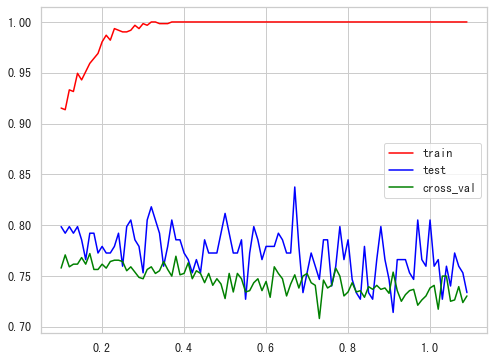

In [56]:
# 变换梯度提升树中的学习率参数

tr = []; te = []; cv=[]
list = np.arange(0.1, 1.1, 0.01)
for i in list:
    gbdt = GradientBoostingClassifier(learning_rate=i, random_state=0)
    gbdt = gbdt.fit(X_train, Y_train)
    score_te = gbdt.score(X_test,Y_test)
    score_tr = gbdt.score(X_train,Y_train)
    score_cv = cross_val_score(gbdt,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(list,tr,color='red',label='train')
plt.plot(list,te,color='blue',label='test')
plt.plot(list,cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### ⚠️ 从学习曲线中可以看到，当弱学习器的个数超过300，模型可能会趋于过拟合，而且当超过400时，模型在测试集上的得分略有下降，所以可以将该参数控制在1-300之间。当学习率超过0.4时，模型在训练集上趋于过拟合，交叉验证集的得分开始下降，所以在后续搜索时可以将模型控制在0-0.4之间。

#### 8.2 网格搜索寻找最优参数

In [57]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置n_estimators、learning_rate、max_depth三个参数，
其中n_estimators是最大的弱学习器的个数，
learning_rate是每个弱学习器的权重缩减系数，max_depth是树的最大深度。
'''
param_grid = {'n_estimators':np.arange(1,300,50),
              'learning_rate':np.linspace(0,0.4,5),
              'max_depth':np.arange(1, 10, 1)}
gbdt = GradientBoostingClassifier()
grid_search(gbdt, param_grid)

Best parameters:{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 51}
Best cross-validation score:0.767
Training set score:0.878
Test set score:0.812


#### 8.3 评估搜索到的最优模型

训练集的得分为：0.8778501628664495
测试集的得分为：0.8116883116883117
该模型在测试集上的误分类个数为：29
该模型的混淆矩阵为:
[[88 11]
 [18 37]]


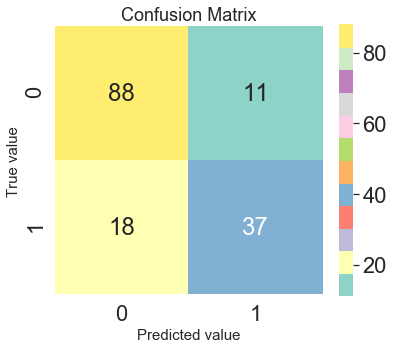

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        99
           1       0.77      0.67      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



In [58]:
'''
由网格搜索可得，当n_estimators=51，learning_rate=0.1，max_depth=3时，
交叉验证集的得分最高，所以在这种参数设置下评估模型的预测效果。
'''
gbdt = GradientBoostingClassifier(n_estimators=51, learning_rate=0.1,
                                 max_depth=3, random_state=0)
model_evaluation(gbdt)

In [59]:
gbdt.feature_importances_      # 输出各个特征的重要性

array([0.05263381, 0.45536474, 0.0362631 , 0.00884952, 0.03957109,
       0.18397948, 0.10393261, 0.11940565])

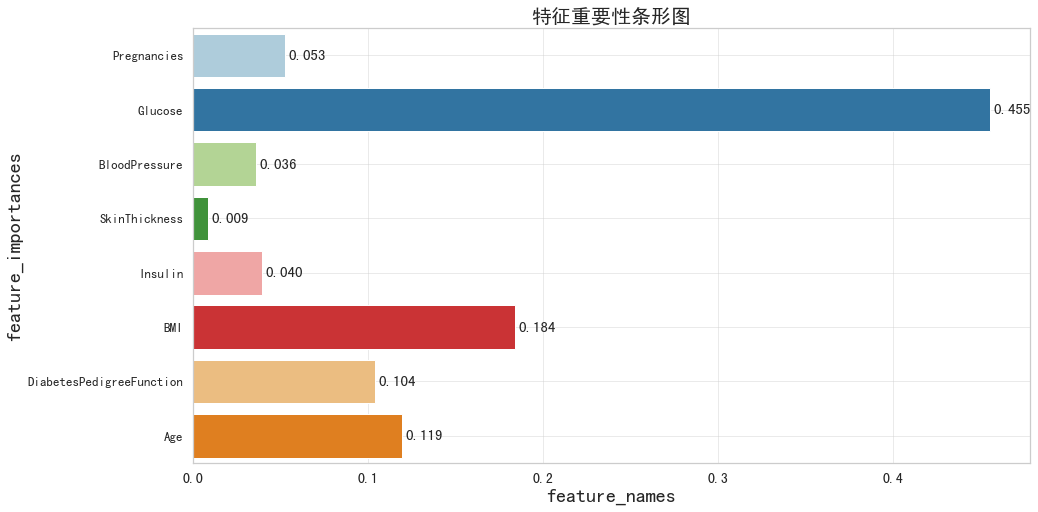

In [60]:
plot_feature_importances(gbdt)    # 特征重要性可视化

### 分析：网格搜索到的梯度集成模型为GradientBoostingClassifier(n_estimators=51, learning_rate=0.1, max_depth=3, random_state=0)，误判个数为29个，在训练集上的得分为0.878，在测试集上的得分为0.812，泛化能力是目前最好的。而且该模型将Glucose的特征重要性视为最大，其次是BMI，SkinThickness的重要性最低。另外从测试报告中可知，准确率为0.81，预测不患病的f1_score为0.86，预测患病的f1_score为0.72，预测是否患病的准确率是最高的。

### 9. 神经网络

#### 9.1 学习曲线模拟
多层感知器的一个重要参数alpha是正则化参数， 用于权重更新；另外模型分类还需要估计网络的复杂度，即层数和每层的神经元个数，需要调节hidden_layer_size,可以先画出1-6个隐层的学习曲线，然后缩小调参范围逐步增加找到合适的值。

交叉验证的最大得分为:0.7735251676428148，最大得分的下标为:4


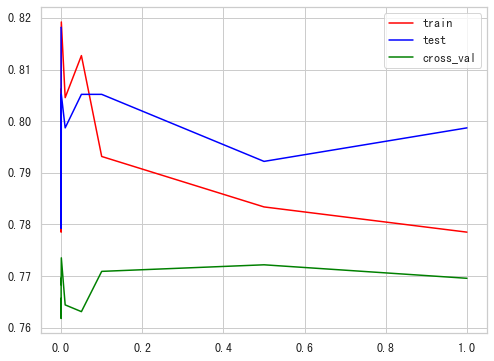

In [61]:
from sklearn.neural_network import MLPClassifier

# 调整神经网络模型的alpha参数
tr = []; te = []; cv=[]
list = [1e-6, 0.00001, 0.00005, 0.0001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1]
for i in list:
    mlp = MLPClassifier(alpha=i, hidden_layer_sizes=(15,), batch_size=30, solver='adam')
    mlp = mlp.fit(X_train, Y_train)
    score_te = mlp.score(X_test,Y_test)
    score_tr = mlp.score(X_train,Y_train)
    score_cv = cross_val_score(mlp,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(list,tr,color='red',label='train')
plt.plot(list,te,color='blue',label='test')
plt.plot(list,cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12,loc="best")
plt.show()

交叉验证的最大得分为:0.7683133859604447，最大得分的下标为:0


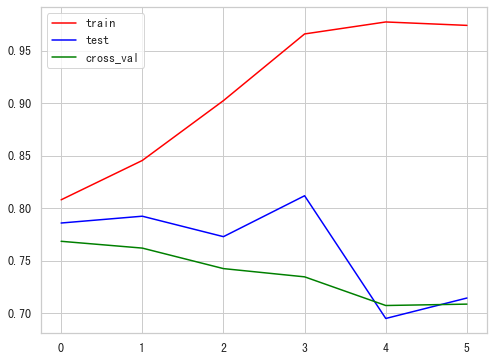

In [62]:
# 调整神经网络的层数和神经元个数
tr = []; te = []; cv=[]
layers = [(15,),(15,15),(15,15,15),(15,15,15,15),(15,15,15,15,15),(15,15,15,15,15,15)]
for i in layers:
    mlp = MLPClassifier(alpha=0.0005, hidden_layer_sizes=i, batch_size=30, solver='adam')
    mlp = mlp.fit(X_train, Y_train)
    score_te = mlp.score(X_test,Y_test)
    score_tr = mlp.score(X_train,Y_train)
    score_cv = cross_val_score(mlp,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(range(6),tr,color='red',label='train')
plt.plot(range(6),te,color='blue',label='test')
plt.plot(range(6),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12,loc="best")
plt.show()

交叉验证的最大得分为:0.7800186741363211，最大得分的下标为:15


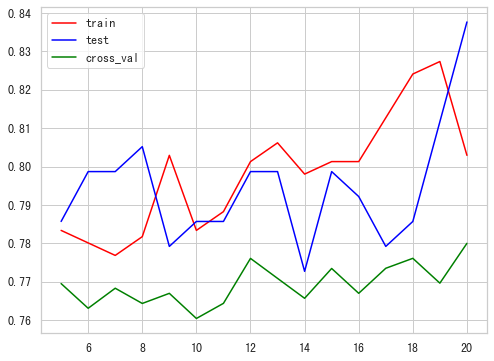

In [63]:
# 单层神经网络效果较好，接着调整隐藏层中神经元个数
tr = []; te = []; cv=[]

for i in range(5, 21):
    mlp = MLPClassifier(alpha=0.0005, hidden_layer_sizes=(i,), batch_size=30, solver='adam')
    mlp = mlp.fit(X_train, Y_train)
    score_te = mlp.score(X_test,Y_test)
    score_tr = mlp.score(X_train,Y_train)
    score_cv = cross_val_score(mlp,data,target,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(range(5, 21),tr,color='red',label='train')
plt.plot(range(5, 21),te,color='blue',label='test')
plt.plot(range(5, 21),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12,loc="best")
plt.show()

#### 9.2 网格搜索寻找最优参数

In [64]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置alpha、hidden_layer_sizes、batch_size三个参数，
其中alpha是正则化系数，hidden_layer_sizes是隐藏层的层数和神经元个数，
batch_size是随机优化器的minibatch的大小。
'''
param_grid = {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
              'hidden_layer_sizes':[(17,),(17,17)],
              'batch_size':[10,20,30,40,50,60]}
mlp = MLPClassifier()
grid_search(mlp, param_grid)

Best parameters:{'alpha': 0.1, 'batch_size': 40, 'hidden_layer_sizes': (17,)}
Best cross-validation score:0.764
Training set score:0.814
Test set score:0.812


#### 9.3 评估搜索到的最优模型

训练集的得分为：0.7947882736156352
测试集的得分为：0.8246753246753247
该模型在测试集上的误分类个数为：27
该模型的混淆矩阵为:
[[89 10]
 [17 38]]


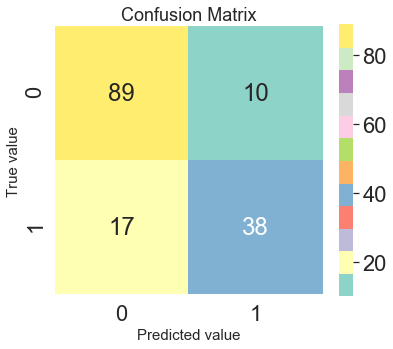

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        99
           1       0.79      0.69      0.74        55

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



In [68]:
'''
由网格搜索可得，当alpha=0.1,hidden_layer_sizes=(17,),batch_size=40时，
交叉验证集的得分最高，所以在这种参数设置下评估模型的预测效果。
'''
mlp = MLPClassifier(alpha=0.1, hidden_layer_sizes=(17,),
                    batch_size=40, solver='adam')
model_evaluation(mlp)

### 分析：网格搜索到的神经网络模型为MLPClassifier(alpha=0.1, hidden_layer_sizes=(17,),batch_size=40, solver='adam')，误判个数为27个，在训练集上的得分为0.795，在测试集上的得分为0.825，泛化能力最好。从测试报告中可知，准确率为0.82，预测不患病的f1_score为0.87，预测患病的f1_score为0.74，准确率最高。神经网络一般可以战胜其他方法，但是一般需要更多的训练时间。

### 总结：本案例使用了许多特征处理方法对数据进行可视化和预处理，将数据集划分为训练集和测试集，然后利用学习曲线缩小调参范围，并利用包含交叉验证的网格搜索方法搜索较优参数模型，然后通过混淆矩阵和测试报告评估模型。本文使用了大部分有监督学习的分类方法，包括决策树、SVM、朴素贝叶斯、逻辑回归、KNN、随机森林、Adaboost、GBDT和神经网络模型，其中泛化能力最好的是神经网络，其次是GBDT，集成模型一般比单个学习器的效果更好，但是训练时间更长。所以可以根据不同的数据选择不同的分类模型，然后通过调整模型的参数，找到一个最佳模型。